<a href="https://colab.research.google.com/github/donbcolab/composable_vlms/blob/main/notebooks/brain_tumor_detection_bb_seg_weave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Landing AI - brain tumor detection

use detection (bounding box) and segmentation (segmenation and mask) techniques to detect brain tumors in the image.

## Creating instructions

- Load the image from the given file path '/home/user/tmp9873xen5.jpg'.
- Use the 'owl_v2' tool to detect brain tumors in the image. The prompt should be 'brain tumor'.
- Use the 'grounding_sam' tool to segment brain tumors in the image. The prompt should be 'brain tumor'.
- Overlay the bounding boxes from the detection results on the original image using the 'overlay_bounding_boxes' utility.
- Overlay the segmentation masks from the segmentation results on the original image using the 'overlay_segmentation_masks' utility.
- Save the final image with both bounding boxes and segmentation masks to a specified output path.

## Retrieving tools

- 'load_image' is a utility function that loads an image from the given file path string.
'save_image' is a utility function that saves an image to a file path.
- 'owl_v2' is a tool that can detect and count multiple objects given a text prompt such as category names or referring expressions. The categories in text prompt are separated by commas. It returns a list of bounding boxes with normalized coordinates, label names and associated probability scores.
- 'florencev2_object_detection' is a tool that can detect common objects in an image without any text prompt or thresholding. It returns a list of detected objects as labels and their location as bounding boxes.
- 'grounding_sam' is a tool that can segment multiple objects given a text prompt such as category names or referring expressions. The categories in text prompt are separated by commas or periods. It returns a list of bounding boxes, label names, mask file names and associated probability scores.
- 'detr_segmentation' is a tool that can segment common objects in an image without any text prompt. It returns a list of detected objects as labels, their regions as masks and their scores.
- 'overlay_bounding_boxes' is a utility function that displays bounding boxes on an image.
- 'overlay_heat_map' is a utility function that displays a heat map on an image.
- 'overlay_segmentation_masks' is a utility function that displays segmentation masks.



In [1]:
!pip install -qU git+https://github.com/donbr/vision-agent.git git+https://github.com/donbr/vision-agent-tools.git weave wandb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.7 MB/s eta 0:00:0

In [2]:
import os
os.environ['XDG_RUNTIME_DIR'] = '/tmp/runtime-dir'

In [3]:
import os
from google.colab import userdata
import wandb, weave

WEAVE_PROJECT = "brain_tumor_detection"

# setting the WANDB_API_KEY environment variable
os.environ['WANDB_API_KEY'] = userdata.get('WANDB_API_KEY')

In [4]:
weave.init(WEAVE_PROJECT)

Logged in as Weights & Biases user: dwbranson.
View Weave data at https://wandb.ai/dwbranson/brain_tumor_detection/weave


In [5]:
from typing import *
from pillow_heif import register_heif_opener
register_heif_opener()
import vision_agent as va
from vision_agent.tools import register_tool


from typing import *
import numpy as np
from vision_agent.tools import load_image, grounding_sam, save_image, overlay_segmentation_masks, overlay_bounding_boxes

def detect_and_segment_brain_tumor(image_path: str, output_path: str, debug: bool = False) -> None:
    """
    Detect and segment the brain tumor in the given image and save the result.

    Parameters:
        image_path (str): The path to the input image.
        output_path (str): The path to save the output image.
        debug (bool): Flag to toggle logging on and off.
    """
    # Step 1: Load the image
    image = load_image(image_path)
    if debug:
        print("Image loaded successfully.")

    # Step 2: Detect and segment the brain tumor
    prompt = "brain tumor"
    detection_results = grounding_sam(prompt, image)
    if debug:
        print(f"Detection results: {detection_results}")

    # Step 3: Overlay the bounding boxes on the image
    image_with_bboxes = overlay_bounding_boxes(image, detection_results)
    if debug:
        print("Bounding boxes overlaid on the image.")

    # Step 4: Overlay the segmentation masks on the image
    image_with_masks = overlay_segmentation_masks(image_with_bboxes, detection_results)
    if debug:
        print("Segmentation masks overlaid on the image.")

    # Step 5: Save the resulting image
    save_image(image_with_masks, output_path)
    if debug:
        print(f"Image saved to {output_path}")

# Example usage (uncomment to run):
# detect_and_segment_brain_tumor("/home/user/tmp9873xen5.jpg", "/home/user/segmented_brain_tumor.jpg", debug=True)


🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/3e1cb993-4213-46fd-be7b-8753bba53b4f
🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/f2b286a5-7052-4d23-8e0d-5c67f09652c9
🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/e7444e05-1716-4764-9138-685aa6c64dd2
🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/771beb01-db5f-4877-867c-04def0fcbdbc


In [6]:
# Test case for the provided code
def test_detect_and_segment_brain_tumor():
    """
    Test case to verify the fundamental functionality of the detect_and_segment_brain_tumor function.
    """
    # Define the input and output paths
    input_image_url = "https://huggingface.co/spaces/dwb2023/cellvisionai-agentic/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg"
    input_image_path = "/content/tmp_brain_tumor.jpg"
    output_image_path = "/content/segmented_brain_tumor.jpg"

    # doenload input_imagae_url to input_image_path location
    !wget -O $input_image_path $input_image_url

    # Call the function with debug mode enabled
    detect_and_segment_brain_tumor(input_image_path, output_image_path, debug=True)

    # Load the output image to verify it was saved correctly
    output_image = load_image(output_image_path)

    # Print the shape of the output image to verify it is not empty
    print(f"Output image shape: {output_image.shape}")

    # Return the output image shape for verification
    return output_image.shape

--2024-07-19 21:02:40--  https://huggingface.co/spaces/dwb2023/cellvisionai-agentic/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg
Resolving huggingface.co (huggingface.co)... 18.239.50.80, 18.239.50.49, 18.239.50.16, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.80|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /spaces/dwb2023/omniscience/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg [following]
--2024-07-19 21:02:40--  https://huggingface.co/spaces/dwb2023/omniscience/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 200 OK
Length: 43119 (42K) [image/jpeg]
Saving to: ‘/content/tmp_brain_tumor.jpg’

/content/tmp_brain_ 100%[===================>]  42.11K  --.-KB/s    in 0.08s   

2024-07-19 21:02:41 (518 KB/s) - ‘/content/tmp_brain_tumor.jpg’ saved [43119/43119]

🍩 http

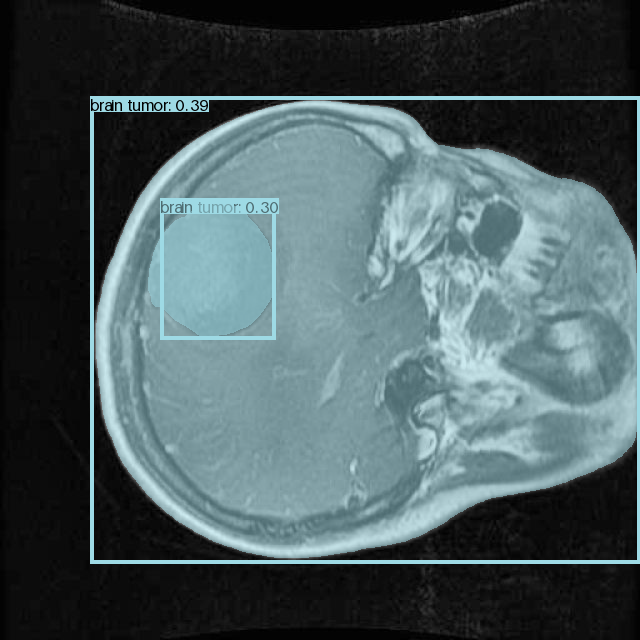

🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/f4a69318-dee1-47e2-b4db-b0337ba331ee
Image saved to /content/segmented_brain_tumor.jpg
🍩 https://wandb.ai/dwbranson/brain_tumor_detection/r/call/511de04f-3b25-4c72-8470-36ef23017ca3
Output image shape: (640, 640, 3)


(640, 640, 3)

In [7]:
# Run the test case
test_detect_and_segment_brain_tumor()

## Documentation created while setting up image processing

### Retrieving tools - detailed notes on tool selection

load_image(image_path: str) -> numpy.ndarray:
'load_image' is a utility function that loads an image from the given file path string.

    Parameters:
        image_path (str): The path to the image.

    Returns:
        np.ndarray: The image as a NumPy array.

    Example
    -------
        >>> load_image("path/to/image.jpg")
  

save_image(image: numpy.ndarray, file_path: str) -> None:
'save_image' is a utility function that saves an image to a file path.

    Parameters:
        image (np.ndarray): The image to save.
        file_path (str): The path to save the image file.

    Example
    -------
        >>> save_image(image)
    

owl_v2(prompt: str, image: numpy.ndarray, box_threshold: float = 0.1, iou_threshold: float = 0.1) -> List[Dict[str, Any]]:
'owl_v2' is a tool that can detect and count multiple objects given a text
    prompt such as category names or referring expressions. The categories in text prompt
    are separated by commas. It returns a list of bounding boxes with
    normalized coordinates, label names and associated probability scores.

    Parameters:
        prompt (str): The prompt to ground to the image.
        image (np.ndarray): The image to ground the prompt to.
        box_threshold (float, optional): The threshold for the box detection. Defaults
            to 0.10.
        iou_threshold (float, optional): The threshold for the Intersection over Union
            (IoU). Defaults to 0.10.

    Returns:
        List[Dict[str, Any]]: A list of dictionaries containing the score, label, and
            bounding box of the detected objects with normalized coordinates between 0
            and 1 (xmin, ymin, xmax, ymax). xmin and ymin are the coordinates of the
            top-left and xmax and ymax are the coordinates of the bottom-right of the
            bounding box.

    Example
    -------
        >>> owl_v2("car. dinosaur", image)
        [
            {'score': 0.99, 'label': 'dinosaur', 'bbox': [0.1, 0.11, 0.35, 0.4]},
            {'score': 0.98, 'label': 'car', 'bbox': [0.2, 0.21, 0.45, 0.5},
        ]
    

florencev2_object_detection(image: numpy.ndarray) -> List[Dict[str, Any]]:
'florencev2_object_detection' is a tool that can detect common objects in an
    image without any text prompt or thresholding. It returns a list of detected objects
    as labels and their location as bounding boxes.

    Parameters:
        image (np.ndarray): The image to used to detect objects

    Returns:
        List[Dict[str, Any]]: A list of dictionaries containing the score, label, and
            bounding box of the detected objects with normalized coordinates between 0
            and 1 (xmin, ymin, xmax, ymax). xmin and ymin are the coordinates of the
            top-left and xmax and ymax are the coordinates of the bottom-right of the
            bounding box. The scores are always 1.0 and cannot be thresholded

    Example
    -------
        >>> florencev2_object_detection(image)
        [
            {'score': 1.0, 'label': 'window', 'bbox': [0.1, 0.11, 0.35, 0.4]},
            {'score': 1.0, 'label': 'car', 'bbox': [0.2, 0.21, 0.45, 0.5},
            {'score': 1.0, 'label': 'person', 'bbox': [0.34, 0.21, 0.85, 0.5},
        ]
    

grounding_sam(prompt: str, image: numpy.ndarray, box_threshold: float = 0.2, iou_threshold: float = 0.2) -> List[Dict[str, Any]]:
'grounding_sam' is a tool that can segment multiple objects given a
    text prompt such as category names or referring expressions. The categories in text
    prompt are separated by commas or periods. It returns a list of bounding boxes,
    label names, mask file names and associated probability scores.

    Parameters:
        prompt (str): The prompt to ground to the image.
        image (np.ndarray): The image to ground the prompt to.
        box_threshold (float, optional): The threshold for the box detection. Defaults
            to 0.20.
        iou_threshold (float, optional): The threshold for the Intersection over Union
            (IoU). Defaults to 0.20.

    Returns:
        List[Dict[str, Any]]: A list of dictionaries containing the score, label,
            bounding box, and mask of the detected objects with normalized coordinates
            (xmin, ymin, xmax, ymax). xmin and ymin are the coordinates of the top-left
            and xmax and ymax are the coordinates of the bottom-right of the bounding box.
            The mask is binary 2D numpy array where 1 indicates the object and 0 indicates
            the background.

    Example
    -------
        >>> grounding_sam("car. dinosaur", image)
        [
            {
                'score': 0.99,
                'label': 'dinosaur',
                'bbox': [0.1, 0.11, 0.35, 0.4],
                'mask': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
            },
        ]
    

detr_segmentation(image: numpy.ndarray) -> List[Dict[str, Any]]:
'detr_segmentation' is a tool that can segment common objects in an
    image without any text prompt. It returns a list of detected objects
    as labels, their regions as masks and their scores.

    Parameters:
        image (np.ndarray): The image used to segment things and objects

    Returns:
        List[Dict[str, Any]]: A list of dictionaries containing the score, label
            and mask of the detected objects. The mask is binary 2D numpy array where 1
            indicates the object and 0 indicates the background.

    Example
    -------
        >>> detr_segmentation(image)
        [
            {
                'score': 0.45,
                'label': 'window',
                'mask': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
            },
            {
                'score': 0.70,
                'label': 'bird',
                'mask': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
            },
        ]
    

overlay_bounding_boxes(image: numpy.ndarray, bboxes: List[Dict[str, Any]]) -> numpy.ndarray:
'overlay_bounding_boxes' is a utility function that displays bounding boxes on
    an image.

    Parameters:
        image (np.ndarray): The image to display the bounding boxes on.
        bboxes (List[Dict[str, Any]]): A list of dictionaries containing the bounding
            boxes.

    Returns:
        np.ndarray: The image with the bounding boxes, labels and scores displayed.

    Example
    -------
        >>> image_with_bboxes = overlay_bounding_boxes(
            image, [{'score': 0.99, 'label': 'dinosaur', 'bbox': [0.1, 0.11, 0.35, 0.4]}],
        )
    

overlay_heat_map(image: numpy.ndarray, heat_map: Dict[str, Any], alpha: float = 0.8) -> numpy.ndarray:
'overlay_heat_map' is a utility function that displays a heat map on an image.

    Parameters:
        image (np.ndarray): The image to display the heat map on.
        heat_map (Dict[str, Any]): A dictionary containing the heat map under the key
            'heat_map'.
        alpha (float, optional): The transparency of the overlay. Defaults to 0.8.

    Returns:
        np.ndarray: The image with the heat map displayed.

    Example
    -------
        >>> image_with_heat_map = overlay_heat_map(
            image,
            {
                'heat_map': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 125, 125, 125]], dtype=uint8),
            },
        )
    

overlay_segmentation_masks(image: numpy.ndarray, masks: List[Dict[str, Any]]) -> numpy.ndarray:
'overlay_segmentation_masks' is a utility function that displays segmentation
    masks.

    Parameters:
        image (np.ndarray): The image to display the masks on.
        masks (List[Dict[str, Any]]): A list of dictionaries containing the masks.

    Returns:
        np.ndarray: The image with the masks displayed.

    Example
    -------
        >>> image_with_masks = overlay_segmentation_masks(
            image,
            [{
                'score': 0.99,
                'label': 'dinosaur',
                'mask': array([[0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0],
                    ...,
                    [0, 0, 0, ..., 0, 0, 0],
                    [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
            }],
        )
    

## Vision Agent Tools - model summary

| Model Name          | Hugging Face Model                  | Primary Function               | Use Cases                                                    |
|---------------------|-------------------------------------|-------------------------------|--------------------------------------------------------------|
| OWL-ViT v2          | google/owlv2-base-patch16-ensemble  | Object detection and localization | - Open-world object detection<br>- Locating specific objects based on text prompts |
| Florence-2          | microsoft/florence-base             | Multi-purpose vision tasks      | - Image captioning<br>- Visual question answering<br>- Object detection |
| Depth Anything V2   | LiheYoung/depth-anything-v2-small   | Depth estimation                | - Estimating depth in images<br>- Generating depth maps      |
| CLIP                | openai/clip-vit-base-patch32        | Image-text similarity           | - Zero-shot image classification<br>- Image-text matching    |
| BLIP                | Salesforce/blip-image-captioning-base | Image captioning                | - Generating text descriptions of images                    |
| LOCA                | Custom implementation               | Object counting                 | - Zero-shot object counting<br>- Object counting with visual prompts |
| GIT v2              | microsoft/git-base-textcaps         | Visual question answering and image captioning | - Answering questions about image content<br>- Generating text descriptions of images |
| Grounding DINO      | groundingdino/groundingdino-swint-ogc | Object detection and localization | - Detecting objects based on text prompts                   |
| SAM                 | facebook/sam-vit-huge               | Instance segmentation           | - Text-prompted instance segmentation                       |
| DETR                | facebook/detr-resnet-50             | Object detection                | - General object detection                                  |
| ViT                 | google/vit-base-patch16-224         | Image classification            | - General image classification<br>- NSFW content detection  |
| DPT                 | Intel/dpt-hybrid-midas              | Monocular depth estimation      | - Estimating depth from single images                       |